In [4]:
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X , y = load_digits(return_X_y=True)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, random_state=42, test_size=0.3)

In [8]:
## Define a pipeline to search for the best combination of PCA truncation and classifier regularization.
logistic = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
pipe.fit(X_tr, y_tr)
print(f"Train Score (CV score = {pipe.score(X_tr, y_tr):0.2f}):")
print(f"Test  Score (CV score = {pipe.score(X_ts, y_ts):0.2f}):")

c:\Users\Al-arab\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Train Score (CV score = 0.98):
Test  Score (CV score = 0.96):


[[53  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  1  0  0 61  0  1  1  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  1  0  0  0 53  0  1]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  2  0  0  0  0  3 54]]


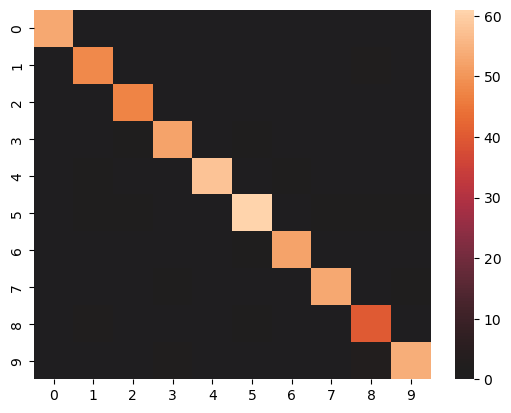

In [9]:
y_pred = pipe.predict(X_ts)
cm = confusion_matrix(y_ts, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()